In [1]:
import json

import plot_likert
import pandas as pd
import numpy as np

In [2]:
results_file = 'survey_results.json'
with open(results_file, 'r') as results_f:
	results = json.load(results_f)

In [3]:
kg_quests = 0
no_kg_quests = 0
similar = 0

for k, v in results.items():
	similar += v['pick_counts']['similar']
	kg_quests += v['pick_counts']['kg']
	no_kg_quests += v['pick_counts']['no_kg']

In [4]:
columns = ['Relatedness', 'Contradiction', 'Coherence', 'Value']
questions_arr = list(results.keys())

likert_mapping = {
    'Strongly Agree': plot_likert.scales.agree[4],
    'Agree': plot_likert.scales.agree[3],
    'Neutral': plot_likert.scales.agree[2],
    'Disagree': plot_likert.scales.agree[1],
    'Strongly Disagree': plot_likert.scales.agree[0]
}

In [6]:
kg_rel = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['kg']['relatedness'][value] for x in questions_arr])
	kg_rel.extend([likert_mapping[value]] * curr_size)
kg_cont = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['kg']['contradiction'][value] for x in questions_arr])
	kg_cont.extend([likert_mapping[value]] * curr_size)
kg_coh = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['kg']['coherence'][value] for x in questions_arr])
	kg_coh.extend([likert_mapping[value]] * curr_size)
kg_val = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['kg']['value'][value] for x in questions_arr])
	kg_val.extend([likert_mapping[value]] * curr_size)

In [7]:
kg_data = pd.DataFrame(zip(kg_rel, kg_cont, kg_coh, kg_val), columns=columns)

/home/manish/miniconda3/envs/data_expl/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

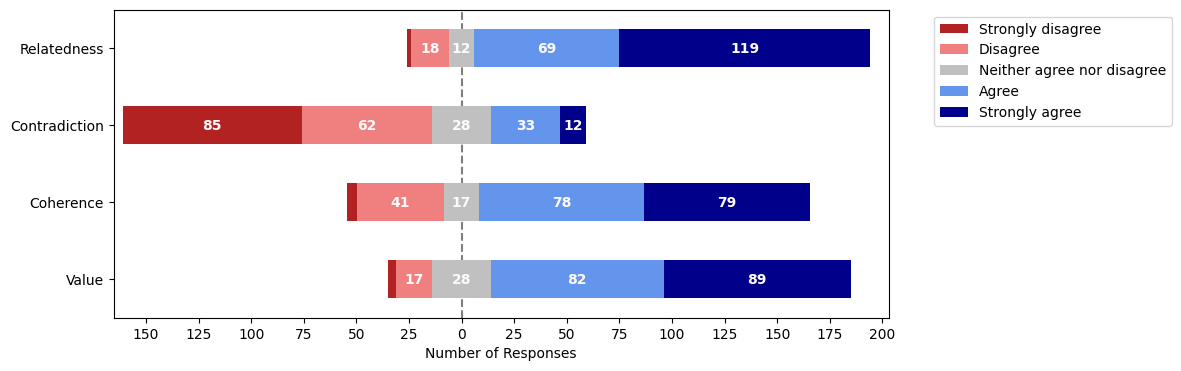

In [14]:
plot_likert.plot_likert(kg_data, plot_likert.scales.agree,
    bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral, figsize=(10,4))

In [9]:
no_kg_rel = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['no_kg']['relatedness'][value] for x in questions_arr])
	no_kg_rel.extend([likert_mapping[value]] * curr_size)
no_kg_cont = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['no_kg']['contradiction'][value] for x in questions_arr])
	no_kg_cont.extend([likert_mapping[value]] * curr_size)
no_kg_coh = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['no_kg']['coherence'][value] for x in questions_arr])
	no_kg_coh.extend([likert_mapping[value]] * curr_size)
no_kg_val = []
for value in likert_mapping.keys():
	curr_size = sum([results[x]['ratings']['no_kg']['value'][value] for x in questions_arr])
	no_kg_val.extend([likert_mapping[value]] * curr_size)

In [10]:
no_kg_data = pd.DataFrame(zip(no_kg_rel, no_kg_cont, no_kg_coh, no_kg_val), columns=columns)

/home/manish/miniconda3/envs/data_expl/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

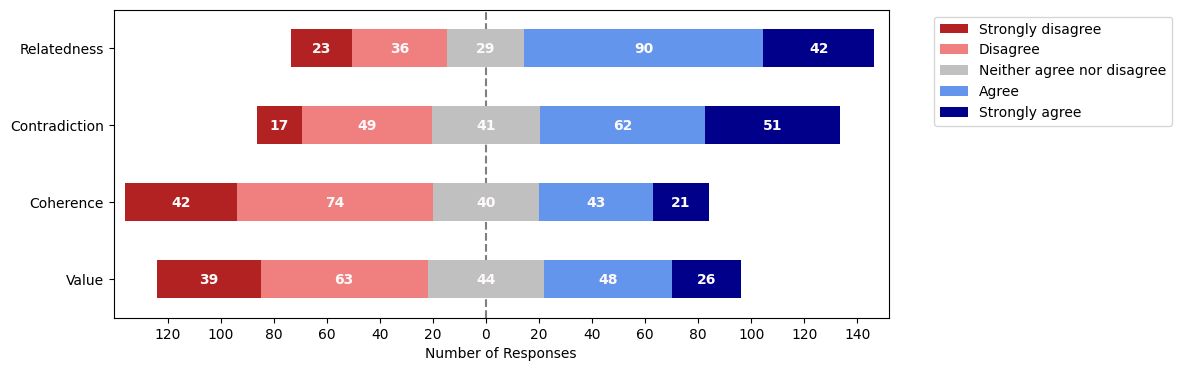

In [15]:
plot_likert.plot_likert(no_kg_data, plot_likert.scales.agree,
    bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral, figsize=(10,4))